<a href="https://colab.research.google.com/github/Brent-Morrison/Misc_scripts/blob/master/Python_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Analyzing US Economic Data and  Building a Dashboard  </h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some essential economic indicators from some data, you will then display these economic indicators in a Dashboard. You can then share the dashboard via an URL.
<p>
<a href="https://en.wikipedia.org/wiki/Gross_domestic_product"> Gross domestic product (GDP)</a> is a measure of the market value of all the final goods and services produced in a period. GDP is an indicator of how well the economy is doing. A drop in GDP indicates the economy is producing less; similarly an increase in GDP suggests the economy is performing better. In this lab, you will examine how changes in GDP impact the unemployment rate. You will take screen shots of every step, you will share the notebook and the URL pointing to the dashboard.</p>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#Section_1"> Define a Function that Makes a Dashboard </a></li>
    <li><a href="#Section_2">Question 1: Create a dataframe that contains the GDP data and display it</a> </li>
    <li><a href="#Section_3">Question 2: Create a dataframe that contains the unemployment data and display it</a></li>
    <li><a href="#Section_4">Question 3: Display a dataframe where unemployment was greater than 8.5%</a></li>
    <li><a href="#Section_5">Question 4: Use the function make_dashboard to make a dashboard</a></li>
        <li><a href="#Section_6"><b>(Optional not marked)</b> Save the dashboard on IBM cloud and display it</a></li>
    </ul>
<p>
    Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>

<h2 id="Section_1"> Define Function that Makes a Dashboard  </h2>

We will import the following libraries.

In [0]:
import pandas as pd
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()

In this section, we define the function <code>make_dashboard</code>. 
You don't have to know how the function works, you should only care about the inputs. The function will produce a dashboard as well as an html file. You can then use this html file to share your dashboard. If you do not know what an html file is don't worry everything you need to know will be provided in the lab. 

In [0]:
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    output_file(file_name)
    p = figure(title=title, x_axis_label='year', y_axis_label='%')
    p.line(x.squeeze(), gdp_change.squeeze(), color="firebrick", line_width=4, legend="% GDP change")
    p.line(x.squeeze(), unemployment.squeeze(), line_width=4, legend="% unemployed")
    show(p)

The dictionary  <code>links</code> contain the CSV files with all the data. The value for the key <code>GDP</code> is the file that contains the GDP data. The value for the key <code>unemployment</code> contains the unemployment data.

In [0]:
links={'GDP':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_gdp.csv',\
       'unemployment':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_unemployment.csv'}

<h3 id="Section_2"> Question 1: Create a dataframe that contains the GDP data and display the first five rows of the dataframe.</h3>

Use the dictionary <code>links</code> and the function <code>pd.read_csv</code> to create a Pandas dataframes that contains the GDP data.

<b>Hint: <code>links["GDP"]</code> contains the path or name of the file.</b>

In [0]:
gdp_df = pd.read_csv(links["GDP"])

Use the method <code>head()</code> to display the first five rows of the GDP data, then take a screen-shot.

In [5]:
gdp_df.head()

,date,level-current,level-chained,change-current,change-chained
0,1948,274.8,2020.0,-0.7,-0.6
1,1949,272.8,2008.9,10.0,8.7
2,1950,300.2,2184.0,15.7,8.0
3,1951,347.3,2360.0,5.9,4.1
4,1952,367.7,2456.1,6.0,4.7


<h3 id="Section_2"> Question 2: Create a dataframe that contains the unemployment data. Display the first five rows of the dataframe. </h3>

Use the dictionary <code>links</code> and the function <code>pd.read_csv</code> to create a Pandas dataframes that contains the unemployment data.

*I have appended the `_df` as otherwise the name of the data frame is the same as one of the columns.  I find this confusing.*

In [0]:
unemployment_df = pd.read_csv(links["unemployment"])

Use the method <code>head()</code> to display the first five rows of the GDP data, then take a screen-shot.

In [7]:
unemployment_df.head()

,date,unemployment
0,1948,3.750000
1,1949,6.050000
2,1950,5.208333
3,1951,3.283333
4,1952,3.025000


<h3 id="Section_3">Question 3: Display a dataframe where unemployment was greater than 8.5%. Take a screen-shot.</h3>

In [8]:
unemployment_df.query('unemployment > 8.5')

,date,unemployment
34,1982,9.708333
35,1983,9.600000
61,2009,9.283333
62,2010,9.608333
63,2011,8.933333


Note that there are other ways to perform the same operation.  I could have used this.....

In [9]:
unemployment_df[unemployment_df['unemployment'] > 8.5].head()

,date,unemployment
34,1982,9.708333
35,1983,9.600000
61,2009,9.283333
62,2010,9.608333
63,2011,8.933333


..... or this.

In [10]:
unemployment_df[unemployment_df.unemployment > 8.5].head()

,date,unemployment
34,1982,9.708333
35,1983,9.600000
61,2009,9.283333
62,2010,9.608333
63,2011,8.933333


Note that [this](https://pandas.pydata.org/docs/getting_started/comparison/index.html) section of the pandas documentation is a handy reference if you are familiar with SQL or R.  This sets out how to perform equivalent operations in these languages.

<h3 id="Section_4">Question 4: Use the function make_dashboard to make a dashboard</h3>

In this section, you will call the function  <code>make_dashboard</code> , to produce a dashboard. We will use the convention of giving each variable the same name as the function parameter.

Create a new dataframe with the column <code>'date'</code> called <code>x</code> from the dataframe that contains the GDP data.

In [0]:
x = gdp_df[['date']]

Create a new dataframe with the column <code>'change-current' </code> called <code>gdp_change</code>  from the dataframe that contains the GDP data.

In [0]:
gdp_change = gdp_df[['change-current']]

Create a new dataframe with the column <code>'unemployment' </code> called <code>unemployment</code>  from the dataframe that contains the  unemployment data.

In [0]:
unemployment = unemployment_df[['unemployment']]

Give your dashboard a string title, and assign it to the variable <code>title</code>

In [0]:
title = 'Unemployment and GDP'

Finally, the function <code>make_dashboard</code> will output an <code>.html</code> in your directory, just like a <code>csv</code> file. The name of the file is <code>"index.html"</code> and it will be stored in the varable  <code>file_name</code>.

In [0]:
file_name = "index.html"

Call the function <code>make_dashboard</code> , to produce a dashboard.  Assign the parameter values accordingly take a the <b>, take a screen shot of the dashboard and submit it</b>.

In [16]:
make_dashboard(x=x, gdp_change=gdp_change, unemployment=unemployment, title=title, file_name=file_name)

<h2>References :</h2> 

<ul>
 <il>
     1) <a href="https://research.stlouisfed.org/">Economic Research at the St. Louis Fed </a>:<a href="https://fred.stlouisfed.org/series/UNRATE/"> Civilian Unemployment Rate</a>
   </il>   
    <p>
     <il>
    2) <a href="https://github.com/datasets">Data Packaged Core Datasets
       </a>
   </il> 
    </p>
    
</ul>
</div>

# Lets look at something in an Irish context (should we have time)

Lets see if we can observe a relationship between the irish unemployment rate and the year over year change in total stock of bank credit issued to the non-financial sector. 

We will use the quandl package to retrieve data.

In [17]:
!pip install quandl

In [0]:
import quandl as ql

# Use Matplotlib instead of Bokeh this time
import matplotlib.pyplot as plt

Grabbing the data.

In [0]:
ql.ApiConfig.api_key = 'hpbPcsfGudN3viBgh8th'

# Credit to Private Non-Financial Sector by Banks
irl_banks = ql.get('BIS/CN_QIEPBM770A') 

# Ireland Standardised unemployment, Rate, Total , Total ; unspecified; Eurostat; Seasonally adjusted
irl_unemp = ql.get('ECB/STS_M_IE_S_UNEH_RTT000_4_000')

Viewing the last entries in each series.

In [20]:
irl_banks.tail()

,Value
Date,
2018-12-31,40.9
2019-03-31,39.6
2019-06-30,39.2
2019-09-30,38.8
2019-12-31,37.7


In [21]:
irl_unemp.tail()

,Percent
Date,
2019-12-31,4.74
2020-01-31,4.86
2020-02-29,4.84
2020-03-31,5.28
2020-04-30,5.37


To get a sense of the data downloaded, we look at the length and frequency of each series.

In [22]:
print('Length of banking series :'.ljust(45)+str(len(irl_banks)))
print('Frequency of banking series :'.ljust(45)+pd.infer_freq(irl_banks.index))
print('\n')
print('Length of unemployment series :'.ljust(45)+str(len(irl_unemp)))
print('Frequency of unemployment series :'.ljust(45)+pd.infer_freq(irl_unemp.index))

Length of banking series :                   195
Frequency of banking series :                Q-DEC


Length of unemployment series :              448
Frequency of unemployment series :           M


The unemployment series is quarterly, while the banking series is monthly.  In order to plot these series, we will join the data, rename columns and interpolate missing values.

In [23]:
# Join series
irl = pd.merge(irl_unemp, irl_banks, how='left', left_index=True, right_index=True)
# Rename columns
irl.columns = ['Unemployment', 'Bank_credit']
irl.tail(10)

,Unemployment,Bank_credit
Date,,
2019-07-31,5.05,NaN
2019-08-31,4.95,NaN
2019-09-30,4.85,38.8
2019-10-31,4.73,NaN
2019-11-30,4.68,NaN
2019-12-31,4.74,37.7
2020-01-31,4.86,NaN
2020-02-29,4.84,NaN
2020-03-31,5.28,NaN


Interpolate missing values returned due to the differing frequencies.  Note that the `merge_ordered` function could have been used above to perform this in one step.

In [24]:
irl.interpolate(method='time', inplace=True)
irl.tail(10)

,Unemployment,Bank_credit
Date,,
2019-07-31,5.05,39.065217
2019-08-31,4.95,38.930435
2019-09-30,4.85,38.800000
2019-10-31,4.73,38.429348
2019-11-30,4.68,38.070652
2019-12-31,4.74,37.700000
2020-01-31,4.86,37.700000
2020-02-29,4.84,37.700000
2020-03-31,5.28,37.700000


We can see the `NaN` values have now been interpolated.  Note that the values post December 2019 have been filled forward.

Opening `NaN` values are not interpolated since there is no initial reference value.

In [25]:
irl.head()

,Unemployment,Bank_credit
Date,,
1983-01-31,12.94,NaN
1983-02-28,13.17,NaN
1983-03-31,13.37,51.900000
1983-04-30,13.54,51.735165
1983-05-31,13.72,51.564835


Compute the year over year change in bank credit and drop NA's.  

The YOY change is computed first.  This is because we want to drop NA's arising from the initial months when there is no prior values to calculate the YOY change.

In [26]:
irl['Bank_credit_YOY']=(irl.Bank_credit.pct_change(periods=12)*100)
irl.dropna(axis=0, inplace=True)
irl.tail(10)

,Unemployment,Bank_credit,Bank_credit_YOY
Date,,,
2019-07-31,5.05,39.065217,-6.166780
2019-08-31,4.95,38.930435,-6.338912
2019-09-30,4.85,38.800000,-6.506024
2019-10-31,4.73,38.429348,-6.945834
2019-11-30,4.68,38.070652,-7.375575
2019-12-31,4.74,37.700000,-7.823961
2020-01-31,4.86,37.700000,-6.803637
2020-02-29,4.84,37.700000,-5.862442
2020-03-31,5.28,37.700000,-4.797980


Now on to the plotting.

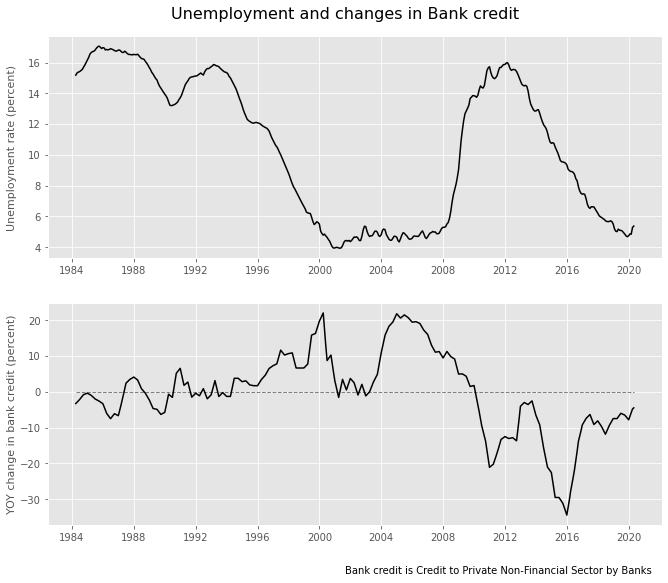

In [27]:
plt.style.use('ggplot')
fig1, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(11, 9))
fig1.suptitle('Unemployment and changes in Bank credit', size = 16).set_y(0.925)
fig1.text(.5, .05, 'Bank credit is Credit to Private Non-Financial Sector by Banks', ha='left')
ax1.plot(irl.index, irl['Unemployment'], 'k-')
ax1.set_ylabel('Unemployment rate (percent)', size = 11)
ax1.get_yaxis().set_label_coords(-0.05,0.5)
ax2.plot(irl.index, irl['Bank_credit_YOY'], 'k-')
ax2.set_ylabel('YOY change in bank credit (percent)', size = 11)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
ax2.hlines(y=0, xmin=irl.index.min(), xmax=irl.index.max(), linestyles='dashed', colors = 'gray', linewidths = 1)

..... This is were you write up the interesting insights from your analysis! .....

